In [1]:
import os, shutil

base_dir = '/home/leafmonk/Documents/Cash Crop 10V1'
csv_dir = '/home/leafmonk/Documents/Cash Crop 10V1/img_csv'
org_img_dir = '/home/leafmonk/Documents/Cash Crop 10V1/img'

data_dir = os.path.join(base_dir, 'data')

train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')

In [2]:
import json

with open('/home/leafmonk/Documents/Cash Crop 10V1/data_dir_dict.json') as json_file: 
    data_dir = json.load(json_file) 

In [3]:
for name in data_dir.keys():
    print('Directories for:', name)
    
    for i in range(len(data_dir[name])):
        print(data_dir[name][i])
        
    print()

Directories for: hemlock
/home/leafmonk/Documents/Cash Crop 10V1/data/train/hemlock
/home/leafmonk/Documents/Cash Crop 10V1/data/validation/hemlock
/home/leafmonk/Documents/Cash Crop 10V1/data/test/hemlock

Directories for: rhododendron
/home/leafmonk/Documents/Cash Crop 10V1/data/train/rhododendron
/home/leafmonk/Documents/Cash Crop 10V1/data/validation/rhododendron
/home/leafmonk/Documents/Cash Crop 10V1/data/test/rhododendron

Directories for: poison oak
/home/leafmonk/Documents/Cash Crop 10V1/data/train/poison oak
/home/leafmonk/Documents/Cash Crop 10V1/data/validation/poison oak
/home/leafmonk/Documents/Cash Crop 10V1/data/test/poison oak

Directories for: lupine
/home/leafmonk/Documents/Cash Crop 10V1/data/train/lupine
/home/leafmonk/Documents/Cash Crop 10V1/data/validation/lupine
/home/leafmonk/Documents/Cash Crop 10V1/data/test/lupine

Directories for: bamboo
/home/leafmonk/Documents/Cash Crop 10V1/data/train/bamboo
/home/leafmonk/Documents/Cash Crop 10V1/data/validation/bamboo

In [4]:
for name in data_dir.keys():
    img_dir = os.path.join(org_img_dir, name)
    path, dirs, files = next(os.walk(img_dir))
    file_count = len(files)
    
    print('Total training', name, 'images:', len(os.listdir(data_dir[name][0])))
    print('Total validation', name, 'images:', len(os.listdir(data_dir[name][1])))
    print('Total test', name ,'images:', len(os.listdir(data_dir[name][2])))
    print('Total images', name, 'images:', file_count)
    print()

Total training hemlock images: 6400
Total validation hemlock images: 800
Total test hemlock images: 800
Total images hemlock images: 8000

Total training rhododendron images: 6400
Total validation rhododendron images: 800
Total test rhododendron images: 800
Total images rhododendron images: 8000

Total training poison oak images: 6391
Total validation poison oak images: 799
Total test poison oak images: 800
Total images poison oak images: 7995

Total training lupine images: 6392
Total validation lupine images: 800
Total test lupine images: 800
Total images lupine images: 7996

Total training bamboo images: 3538
Total validation bamboo images: 442
Total test bamboo images: 443
Total images bamboo images: 4424

Total training hydrangea images: 6003
Total validation hydrangea images: 750
Total test hydrangea images: 751
Total images hydrangea images: 7504

Total training poison ivy images: 6396
Total validation poison ivy images: 800
Total test poison ivy images: 800
Total images poison i

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
target_size = (224,224)
batch_size = 50
epochs = 100

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 55772 images belonging to 10 classes.
Found 6973 images belonging to 10 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from tensorflow.keras.applications.resnet50 import ResNet50

In [9]:
base_model = ResNet50(include_top=False)
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [10]:
model = tf.keras.models.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')])

model.compile(loss='categorical_crossentropy',
        optimizer='SGD',
        metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 25,696,138
Trainable params: 25,643,018
Non-trainable params: 53,120
_________________________________________________________________


In [11]:
history = model.fit(
        train_generator,
        steps_per_epoch=batch_size,
        epochs=epochs,
        validation_data = validation_generator,
        validation_steps=batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 50 steps, validate for 50 steps
Epoch 1/100
50/50 [==============================] - 34s 690ms/step - loss: 1.7791 - accuracy: 0.3936 - val_loss: 2.7281 - val_accuracy: 0.0624
Epoch 2/100
50/50 [==============================] - 29s 571ms/step - loss: 1.2491 - accuracy: 0.5872 - val_loss: 2.6090 - val_accuracy: 0.1104
Epoch 3/100
50/50 [==============================] - 29s 578ms/step - loss: 1.0777 - accuracy: 0.6303 - val_loss: 2.5274 - val_accuracy: 0.1144
Epoch 4/100
50/50 [==============================] - 29s 571ms/step - loss: 0.9425 - accuracy: 0.6740 - val_loss: 2.4910 - val_accuracy: 0.1368
Epoch 5/100
50/50 [==============================] - 29s 583ms/step - loss: 0.8236 - accuracy: 0.7236 - val_loss: 2.5556 - val_accuracy: 0.1192
Epoch 6/100
50/50 [==============================] - 28s 570ms/step - loss: 0.8122 - accuracy: 0.7233 - val_loss: 2.3667 - val_accuracy: 0.1324
Epoch 7/100
50/50 [=========================

50/50 [==============================] - 28s 565ms/step - loss: 0.3423 - accuracy: 0.8816 - val_loss: 0.5486 - val_accuracy: 0.8324
Epoch 57/100
50/50 [==============================] - 28s 564ms/step - loss: 0.3241 - accuracy: 0.8912 - val_loss: 0.5245 - val_accuracy: 0.8388
Epoch 58/100
50/50 [==============================] - 28s 560ms/step - loss: 0.3174 - accuracy: 0.8864 - val_loss: 0.5643 - val_accuracy: 0.8280
Epoch 59/100
50/50 [==============================] - 28s 565ms/step - loss: 0.3328 - accuracy: 0.8780 - val_loss: 0.5284 - val_accuracy: 0.8340
Epoch 60/100
50/50 [==============================] - 28s 566ms/step - loss: 0.3180 - accuracy: 0.8876 - val_loss: 0.6170 - val_accuracy: 0.8104
Epoch 61/100
50/50 [==============================] - 29s 578ms/step - loss: 0.3181 - accuracy: 0.8836 - val_loss: 0.6046 - val_accuracy: 0.8228
Epoch 62/100
50/50 [==============================] - 29s 573ms/step - loss: 0.3143 - accuracy: 0.8936 - val_loss: 0.5140 - val_accuracy: 0.840

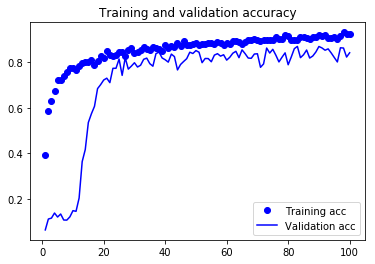

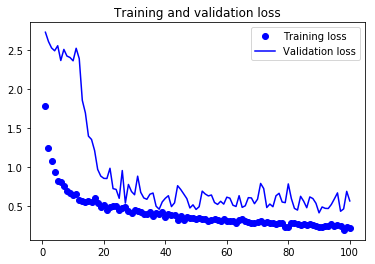

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

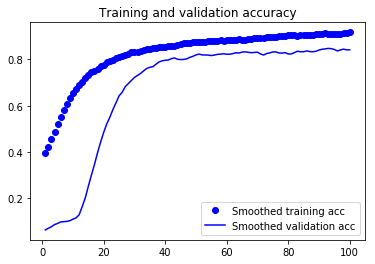

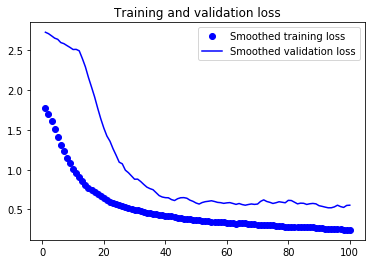

In [13]:
def smooth_curve(points, factor=0.85):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
        smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
        smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
        smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
        smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')
test_loss, test_acc = model.evaluate(test_generator, steps=18)
print('test acc:', test_acc)

Found 6978 images belonging to 10 classes.
  ...
    to  
  ['...']
18/18 [==============================] - 3s 154ms/step - loss: 0.7121 - accuracy: 0.8189
test acc: 0.8188889


In [15]:
model.save('/home/leafmonk/Documents/Cash Crop 10V1/ResNet50/models/10V1_ResNet50_1.h5')

In [16]:
import os, shutil
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [18]:
def predict_plant(image_dir):
    img = load_image(image_dir, show = True)
    out = model.predict(img)
    index = (np.where(out[0]==np.max(out[0])))
    print('Predicted', sorted(list(data_dir.keys()))[index[0][0]])

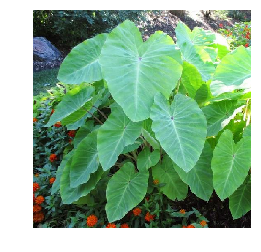

elephant ear


In [24]:
for name in data_dir.keys():
    for i in range(1,4):
        img_name = name + '_' + str(i) + '.jpg'
        new_img = os.path.join('/home/leafmonk/Documents/Cash Crop 10V1/img_predict', img_name)
        predict_plant(new_img)
        print('Actual:', name)
        print()
        print('--------------------------------------------------------------')
        print()

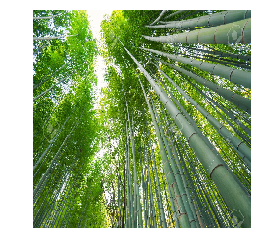

bamboo
